# Lab (week 7): Dimensionality reduction showdown (PCA vs MDS vs Isomap vs t-SNE)

Today we will use MNIST Digits datasets (1797 images of 8x8 handwritten digits).


Why MNIST? - It’s a real-world dataset with nonlinear patterns (digits vary in rotation, thickness, etc.).

But moving on to MNIST data, lets try with the classical example of SWISS ROLL dataset. 

**Prepared by ~ Dr. Indranath Chatterjee**
13/03/2025

## Dimensionality reduction on the Swiss Roll dataset (lets explore it first)
**Goal**: Understand how PCA, MDS, Isomap, and t-SNE handle nonlinear manifolds.  
**Dataset**: Swiss Roll (3D spiral).  
**Why Swiss Roll?**: It’s a classic example of a nonlinear manifold—perfect for testing dimensionality reduction methods!

## Step 1: Generate the Swiss Roll dataset  
Let’s create a 3D spiral (Swiss Roll) with 1000 samples.  

In [1]:
# importing necessary libraries only
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE

In [6]:
# generate Swiss Roll (using randomly generated values - you can change the size)
np.random.seed(42)
X, t = make_swiss_roll(n_samples=10000, noise=0.1, random_state=42)

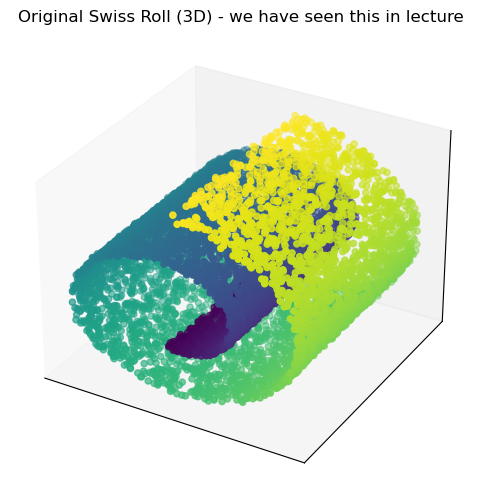

In [7]:
# Plot the 3D Swiss Roll
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis', s=20)
ax.set_title("Original Swiss Roll (3D) - we have seen this in lecture")
ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])  # Hide axes for clarity
plt.show()

The Swiss Roll is a **3D spiral** where points are colored by their position along the spiral.  
Our goal is to "unroll" this spiral into 2D while preserving its structure. 

## Step 2: Apply PCA – The Linear Approach  
PCA is a **linear** method (we already know it). Let’s see how it handles the Swiss Roll. So I want you to write the code. You may not standardize it because it is already randomly generated with curated values. 


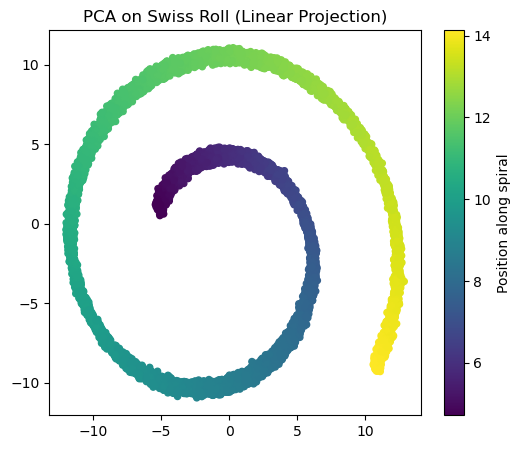

In [8]:
# apply PCA function..
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=t, cmap='viridis', s=20)
plt.title("PCA on Swiss Roll (Linear Projection)")
plt.colorbar(label='Position along spiral')
plt.show()

**Observation**:  
PCA **flattens** the spiral into a 2D plane.  
 - Why does PCA fail here?  
 - **Double click to write your answer here**  

## Step 3: Apply MDS – global distance preservation  
#MDS tries to preserve **pairwise distances** between points. Let’s see if it can unroll the spiral.

In [9]:
# Apply MDS (subset for speed)
np.random.seed(42)
subset = np.random.choice(len(X), 300, replace=False)
X_sub, t_sub = X[subset], t[subset]

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_sub)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


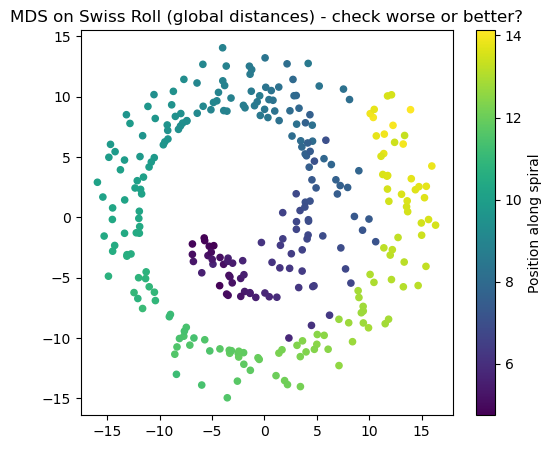

In [10]:
# plot MDS results 
plt.figure(figsize=(6, 5))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=t_sub, cmap='viridis', s=20)
plt.title("MDS on Swiss Roll (global distances) - check worse or better?")
plt.colorbar(label='Position along spiral')
plt.show()

**Observation**:  
 - MDS does a **better job** than PCA but still distorts the spiral.  
 - Why?  
 - **Double click to write your answer here**

## Step 4: Apply Isomap – "Manifold" unfolding  
Isomap uses **geodesic distances** (shortest path on a graph) to model nonlinear manifolds.

In [11]:
# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=15)
X_iso = isomap.fit_transform(X_sub)

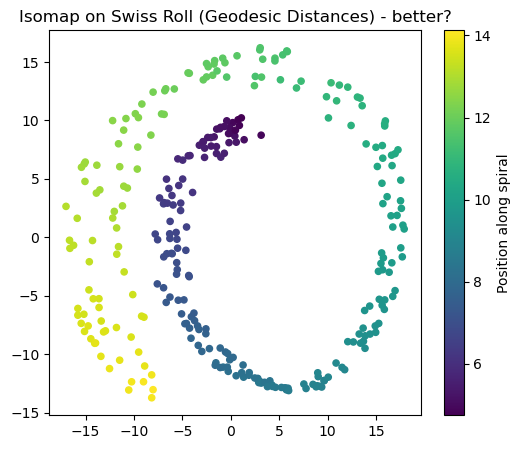

In [13]:
# Plot Isomap results
plt.figure(figsize=(6, 5))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=t_sub, cmap='viridis', s=20)
plt.title("Isomap on Swiss Roll (Geodesic Distances) - better?")
plt.colorbar(label='Position along spiral')
plt.show()

**Observation**:  
 - Isomap **unrolls** the Swiss Roll into a smooth 2D rectangle.  
 - Why does Isomap work so well?  
 - **Double click to write your answer here**

## Step 5: Apply t-SNE – Local Neighborhoods  
 t-SNE focuses on **local neighborhoods**. Let’s see how it handles the Swiss Roll.

In [14]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sub)

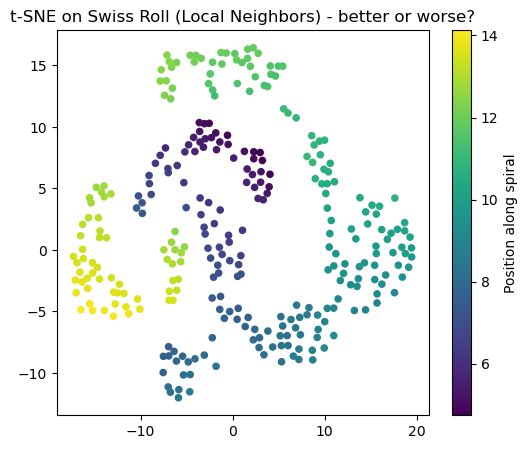

In [16]:
# plotting t-SNE results
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=t_sub, cmap='viridis', s=20)
plt.title("t-SNE on Swiss Roll (Local Neighbors) - better or worse?")
plt.colorbar(label='Position along spiral')
plt.show()

**Observation**:    
 - Does tSNE works better here? Why and how?  
 - **Double click to write your answer here**  

## Step 6: Side-by-side comparison  (like PCA/MDS/ISOMAP/tSNE)
Let’s compare all four methods in one figure.  

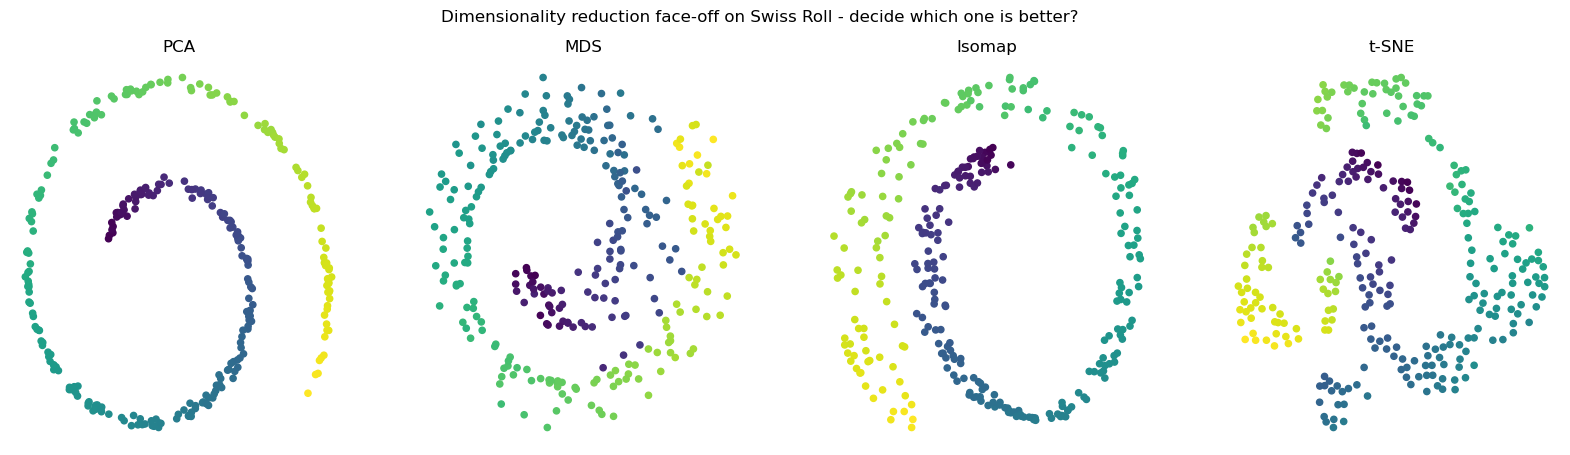

In [18]:
# Plot all methods
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
titles = ['PCA', 'MDS', 'Isomap', 't-SNE']
embeddings = [X_pca[subset], X_mds, X_iso, X_tsne]

for i in range(4):
    ax[i].scatter(embeddings[i][:, 0], embeddings[i][:, 1], c=t_sub, cmap='viridis', s=20)
    ax[i].set_title(titles[i])
    ax[i].axis('off')  # Hide axes for clarity
plt.suptitle("Dimensionality reduction face-off on Swiss Roll - decide which one is better?")
plt.show()

**Observation**:
**Double click to write your answer here**
 - **PCA**: ??
 - **MDS**: ??
 - **Isomap**: ??
 - **t-SNE**: ??

# Now its your turn ---

### Apply the same knowledge to run the algorithms on MNIST dataset. 

For your reference, I am loading the dataset here. You have to write the supporting codes to run them. 

Apart from that, you are advised to perform atleast the **COMPULSORY TASK** in the lab today, and encouraged to do the OPTIONAL TASKS. 

## Part 1: Setup and data loading

### Adding libraries  
Dimensionality reduction is like squishing a 3D marshmallow into 2D - some methods flatten it, others reveal hidden patterns. Today, in this week's lab we’ll see how!

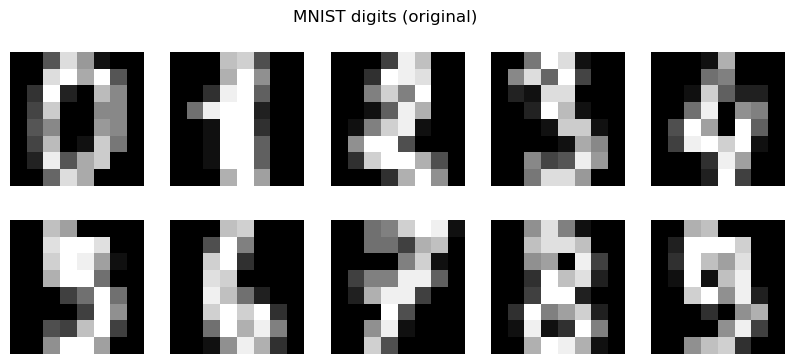

In [8]:
# import libraries (only necessary here)
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA  
from sklearn.manifold import MDS, Isomap, TSNE  
from sklearn.datasets import load_digits  
from sklearn.preprocessing import StandardScaler  

# loading the MNIST digits (8x8 images, 64 features) - we have used library to call, you can use local file too
digits = load_digits()  
X, y = digits.data, digits.target  

# Let's check a few digits  
fig, ax = plt.subplots(2, 5, figsize=(10, 4))  
for i in range(10):  
    ax[i//5, i%5].imshow(X[i].reshape(8, 8), cmap='gray')  
    ax[i//5, i%5].axis('off')  
plt.suptitle("MNIST digits (original)")  
plt.show()  

## Part 2: PCA – the linear approach

### PCA: the "Flat Pancake" method
PCA finds the best **linear** projection. Let’s see how it handles nonlinear digits.

#### Apply PCA on your own:
Apply PCA on this dataset to see the visualization for first few PCs. Selection of number of components depend on you. **Do not forget to apply Standardization before transforming the data**. Here to restructure the same figure you have to 2 PC (just for example). 

In [19]:
# Standardize and apply PCA  


# Plot PCA results  


### Observation:
**Double click to add your observations**

## Part 3: MDS

### MDS: the "Globe Flattener"
MDS tries to preserve **pairwise distances**. Let’s see if global structure helps.

In [20]:
# create subset data (remember MDS is slow!)  


# Apply MDS  
  

# Plot  
 

### Observation:
**Double click to add your observations**

## Part 4: Isomap - manifold unfolding


Isomap uses **geodesic distances** (shortest path on a graph) to model nonlinearity.

In [21]:
# Apply Isomap (k=15 neighbors)  



# Plot  
 

### Observation:
**Double click to add your observations**

## Part 5: t-SNE – local neighborhood wizard

### t-SNE: the "Microscope"

t-SNE zooms into local neighborhoods. Let’s see magic!

In [22]:
# Apply t-SNE (perplexity=30) - just taken randomly - change it as a part of today's lab task



# Plot  
 

### Observation:
**Double click to add your observations**

## Part 6: Side-by-side comparison (to explain visually)

In [23]:
# Plot all methods  


 

## Lab questions (some extension tasks)


1. COMPULSORY TASK: **Tweak Perplexity**: run t-SNE with perplexity=5 to perplexity=50. Which gives better clusters?

2. COMPULSORY TASK: **Break Isomap**: set n_neighbors=2 in Isomap. Why does it fail?

3. OPTIONAL TASK: Apply all methods to the Wine Dataset. Which works best?

4. OPTIONAL TASK: **Distance Metrics**: try MDS with metric=False (non-metric MDS). How do results change?